In [1]:
import os
import pandas as pd

global_window_id = 0

def process_labeled_data(file_path, window_size, step_size):
    """处理labeled_data.csv文件，基于窗口切分数据"""
    global global_window_id
    df = pd.read_csv(file_path)
    tactile_contact_df = pd.read_csv("../DATA/Labeled_data/0724-7DT-S1/0724-7DT-S1_contactBlock.csv")

    windowed_data = []

    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        window = df.iloc[start:end].copy()
        window['window_id'] = global_window_id
        global_window_id += 1

        if (window['label'] == 0).all():
            window['tactile_type_window'] = 'NC'
            window['block_id'] = None
        else:
            window_start_time = window.iloc[0]['time']
            window_end_time = window.iloc[-1]['time']
            matching_contacts = tactile_contact_df[
                (tactile_contact_df['time'] >= window_start_time) & 
                (tactile_contact_df['time'] <= window_end_time)
            ]

            if not matching_contacts.empty:
                window['tactile_type_window'] = matching_contacts.iloc[0]['touch_type']
                window['block_id'] = matching_contacts.iloc[0]['block_id']
            else:
                window['tactile_type_window'] = 'NC'
                window['block_id'] = None
        
        windowed_data.append(window)

    # 将所有窗口数据合并为一个大的DataFrame
    result_df = pd.concat(windowed_data, ignore_index=True)

    # 构造输出文件路径
    output_file_path = file_path.replace(".csv", "_window.csv")

    # 保存为CSV文件
    result_df.to_csv(output_file_path, index=False)
    print(f"窗口化的数据已保存到: {output_file_path}")

# 使用示例
file_path = '../DATA/Labeled_data/0724-7DT-S1/labeled_data.csv'
window_size = 28
step_size = 14

process_labeled_data(file_path, window_size, step_size)


窗口化的数据已保存到: ../DATA/Labeled_data/0724-7DT-S1/labeled_data_window.csv


In [9]:
wind_df = pd.read_csv("/Users/shangyu/Documents/GitHub/tactileGestureDetection/DATA/Labeled_data/0724-7DT-S1/labeled_data_window.csv")


# wind_df['block_id'].nunique()
# wind_df.groupby(['window_id','block_id'])
pd.set_option('display.max_rows', None)

# grouped_df = wind_df.groupby(['window_id', 'block_id']).size().reset_index()[['window_id', 'block_id']]

# # 显示结果
# # print(grouped_df)

# 筛选 window_id 在 82 到 84 之间的数据
# filtered_data = wind_df[wind_df['window_id'].between(82, 84)]
filtered_data = wind_df[wind_df['block_id']==2.0]
filtered_data

,index,time,tau_J0,tau_J1,tau_J2,tau_J3,tau_J4,tau_J5,tau_J6,tau_J_d0,...,etau_J1,etau_J2,etau_J3,etau_J4,etau_J5,etau_J6,label,window_id,tactile_type_window,block_id
2324,1163,11.620014,-0.148950,-17.260244,-1.966746,17.847666,0.364707,2.489208,-0.089855,0.0,...,17.260244,1.966746,-17.847666,-0.364707,-2.489208,0.089855,0,83,DT,2.0
2325,1164,11.629998,-0.224328,-17.220572,-2.077830,17.923044,0.383018,2.499279,-0.099926,0.0,...,17.220572,2.077830,-17.923044,-0.383018,-2.499279,0.099926,0,83,DT,2.0
2326,1165,11.640003,-0.188623,-17.260244,-2.077830,17.883371,0.354637,2.499279,-0.109997,0.0,...,17.260244,2.077830,-17.883371,-0.354637,-2.499279,0.109997,0,83,DT,2.0
2327,1166,11.650008,-0.148950,-17.184866,-2.006419,17.772287,0.373863,2.489208,-0.028515,0.0,...,17.184866,2.006419,-17.772287,-0.373863,-2.489208,0.028515,0,83,DT,2.0
2328,1167,11.660009,-0.148950,-17.220572,-2.006419,17.847666,0.373863,2.499279,-0.049572,0.0,...,17.220572,2.006419,-17.847666,-0.373863,-2.499279,0.049572,0,83,DT,2.0
2329,1168,11.669999,-0.148950,-17.220572,-2.042125,17.847666,0.373863,2.489208,-0.059643,0.0,...,17.220572,2.042125,-17.847666,-0.373863,-2.489208,0.059643,0,83,DT,2.0
2330,1169,11.680010,-0.113244,-17.220572,-2.042125,17.847666,0.364707,2.499279,-0.059643,0.0,...,17.220572,2.042125,-17.847666,-0.364707,-2.499279,0.059643,0,83,DT,2.0
2331,1170,11.690001,-0.188623,-17.260244,-2.006419,17.772287,0.364707,2.489208,-0.089855,0.0,...,17.260244,2.006419,-17.772287,-0.364707,-2.489208,0.089855,0,83,DT,2.0
2332,1171,11.699995,-0.188623,-17.260244,-2.006419,17.772287,0.364707,2.489208,-0.089855,0.0,...,17.260244,2.006419,-17.772287,-0.364707,-2.489208,0.089855,0,83,DT,2.0
2333,1172,11.710004,-0.224328,-17.220572,-2.006419,17.883371,0.364707,2.489208,-0.069713,0.0,...,17.220572,2.006419,-17.883371,-0.364707,-2.489208,0.069713,0,83,DT,2.0


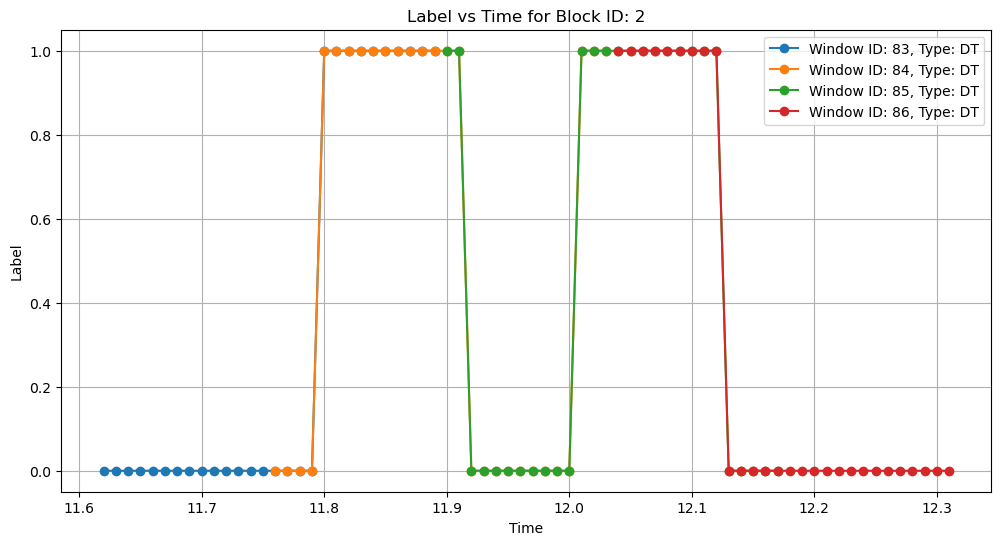

In [6]:
#plot 双拍验证
import pandas as pd
import matplotlib.pyplot as plt

block_id_to_plot = 2

# 筛选出指定 block_id 的数据
block_data = wind_df[wind_df['block_id'] == block_id_to_plot]

# 获取对应的 window_id
window_info  = block_data[['window_id', 'tactile_type_window']].drop_duplicates()

# 绘制图表
plt.figure(figsize=(12, 6))

# 对每个 window_id 单独绘制
for _, row in window_info.iterrows():
    window_id = row['window_id']
    tactile_type = row['tactile_type_window']
    
    # 获取当前 window_id 对应的数据
    window_data = block_data[block_data['window_id'] == window_id]
    
    # 绘制数据
    plt.plot(window_data['time'], window_data['label'], marker='o', label=f'Window ID: {window_id}, Type: {tactile_type}')

# 添加标题和标签
plt.title(f'Label vs Time for Block ID: {block_id_to_plot}')
plt.xlabel('Time')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.show()


